In [ ]:
#Part 1 ‐ Exploratory data analysis


/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_30647/963775569.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  logins_15min = logins_df.resample('15T').size()


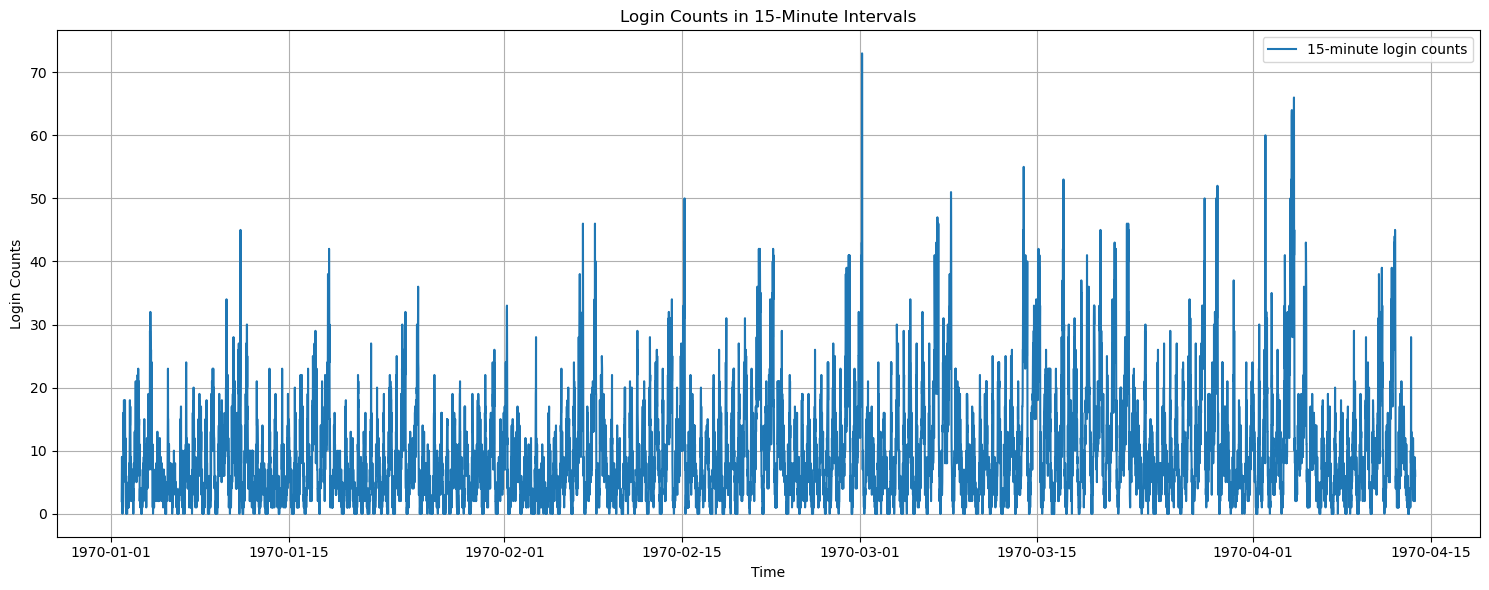

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the logins.json file
logins_df = pd.read_json('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/ultimate_challenge/logins.json')


# Convert the 'login_time' column to datetime
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])

# Set the login_time as index
logins_df.set_index('login_time', inplace=True)

# Aggregate into 15-minute intervals
logins_15min = logins_df.resample('15T').size()

# Plot the time series of 15-minute interval login counts
plt.figure(figsize=(15, 6))
plt.plot(logins_15min, label='15-minute login counts')
plt.title("Login Counts in 15-Minute Intervals")
plt.xlabel("Time")
plt.ylabel("Login Counts")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


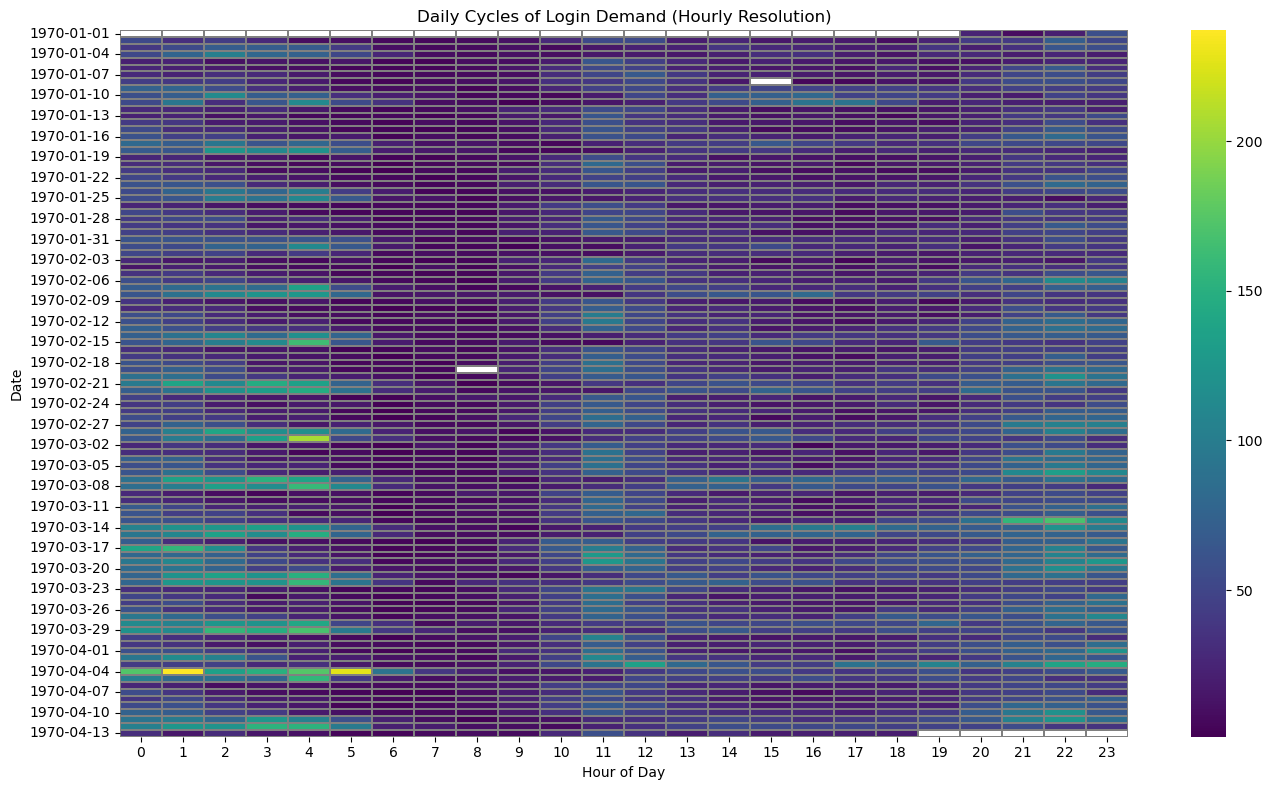

In [11]:
#Daily Cycle

# Create a new column with just the date (to separate days)
logins_df['date'] = logins_df['login_time'].dt.date

# Group by each day and hour to get average hourly logins per day
hourly_by_day = logins_df.groupby(['date', 'hour']).size().reset_index(name='logins')

# Pivot to create a matrix: rows = days, columns = hours
daily_cycle_matrix = hourly_by_day.pivot(index='date', columns='hour', values='logins')

# Plot a heatmap of daily cycles
plt.figure(figsize=(14, 8))
sns.heatmap(daily_cycle_matrix, cmap='viridis', linewidths=0.1, linecolor='gray')
plt.title('Daily Cycles of Login Demand (Hourly Resolution)')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
'''

1. Consistent Daily Rhythm
Across most days, logins follow a clear daily pattern: lower during early morning hours and higher in the evenings (around 6 PM to midnight).
This cycle is remarkably consistent across the entire time period.

2. Evening Peaks
The darkest shades (indicating high demand) are concentrated between 6 PM and 11 PM, confirming this as the daily peak usage window.

3. Low Early Morning Activity
Logins from 2 AM to 6 AM are minimal, indicating little to no usage during these hours — likely tied to typical human sleep cycles.

4. Increasing Engagement Over Time
Slight trend toward higher activity in later dates (bottom of the heatmap), suggesting either:
   A growing user base
   Greater app adoption or marketing pushes

5. Activity Spikes
A few isolated hours have very high spikes (bright yellow), which may suggest:
Campaigns, system-generated logins, or anomalies
These can be flagged for further investigation

This visualization helps clearly illustrate the repeating, predictable daily cycle of demand — 
a crucial insight for resource planning, server scaling, or targeted marketing.

'''               

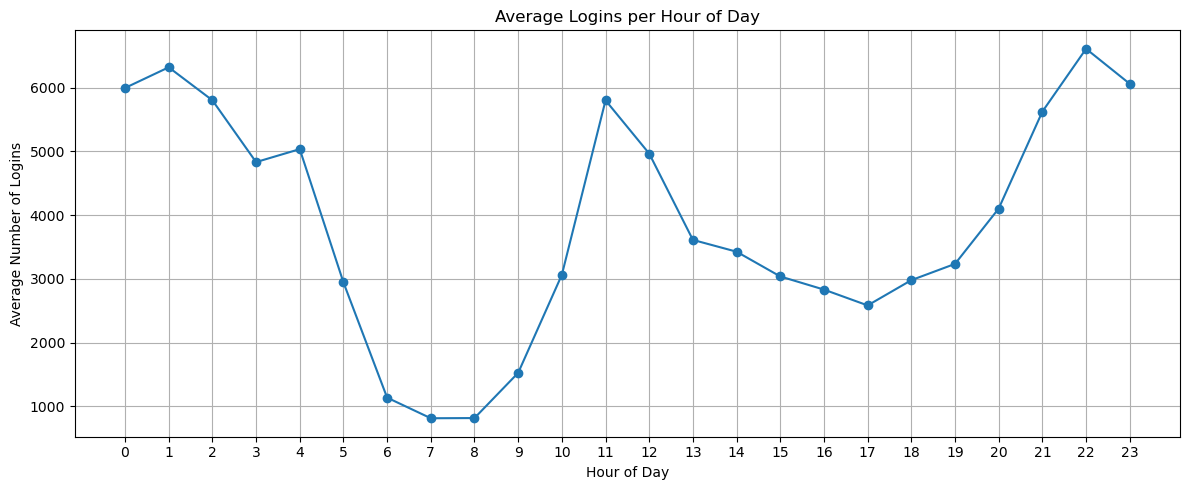

In [13]:
# Average hourly logins across all days
average_hourly = logins_df.groupby('hour').size()

# Plot
plt.figure(figsize=(12, 5))
average_hourly.plot(kind='line', marker='o')
plt.title('Average Logins per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Logins')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


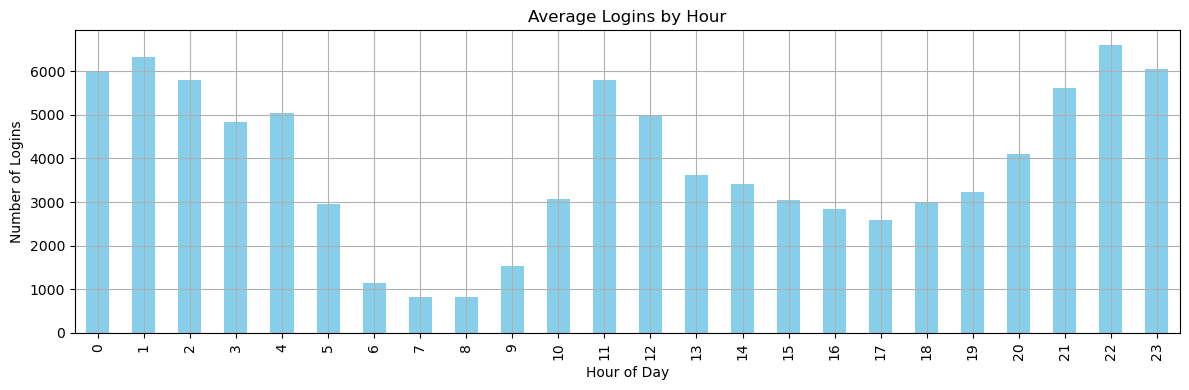

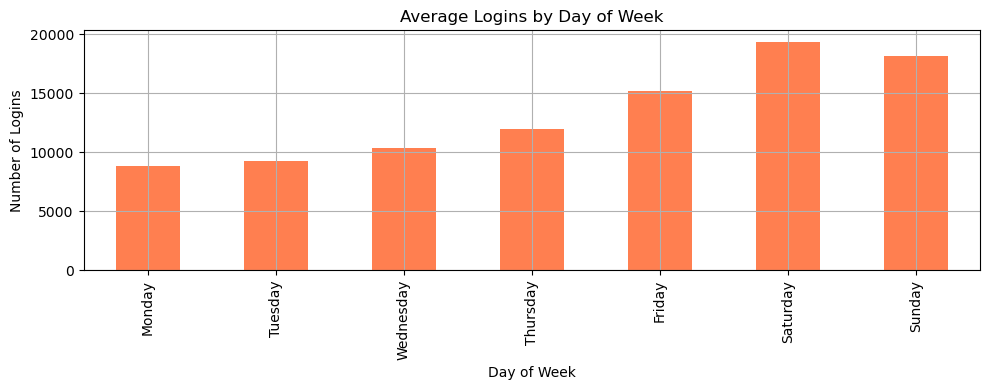

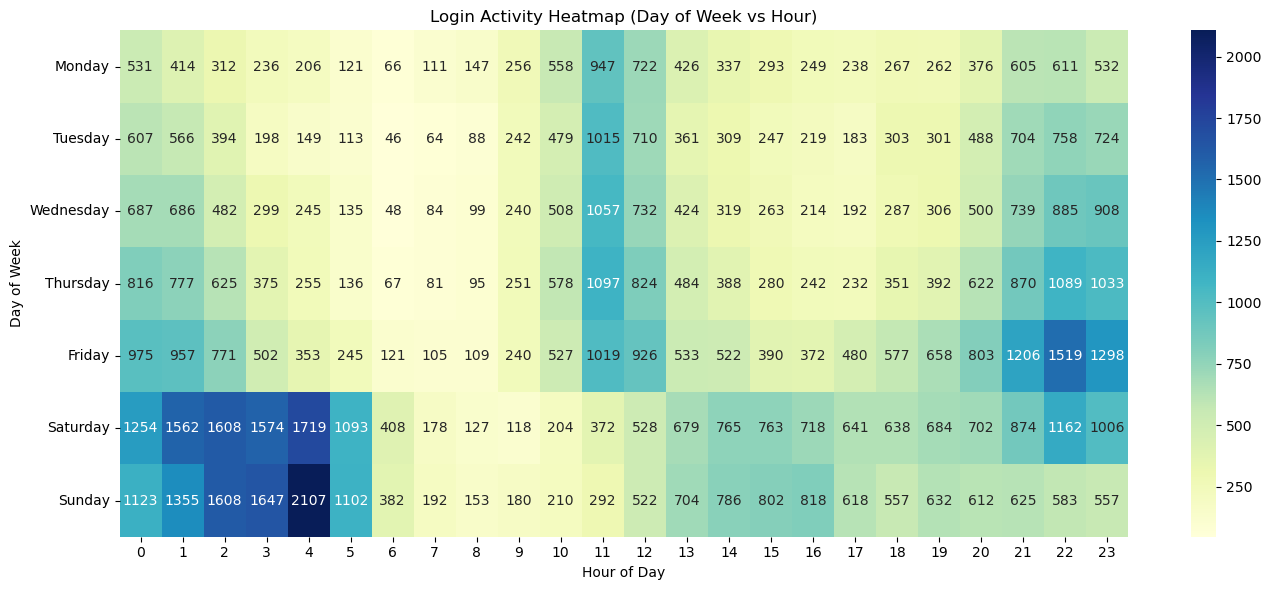

In [9]:

import seaborn as sns

# Convert login_time to datetime and extract hour and day
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])
logins_df_reset = logins_df.copy()
logins_df_reset['hour'] = logins_df_reset['login_time'].dt.hour
logins_df_reset['day_of_week'] = logins_df_reset['login_time'].dt.day_name()

# Group by hour
hourly_counts = logins_df_reset.groupby('hour').size()

# Group by day of week (reorder for clarity)
daily_counts = logins_df_reset.groupby('day_of_week').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Heatmap data: login counts by day and hour
heatmap_data = logins_df_reset.groupby(['day_of_week', 'hour']).size().unstack()
heatmap_data = heatmap_data.reindex(index=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot hourly login pattern
plt.figure(figsize=(12, 4))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Average Logins by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot daily login pattern
plt.figure(figsize=(10, 4))
daily_counts.plot(kind='bar', color='coral')
plt.title('Average Logins by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap: Day of Week vs Hour
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Login Activity Heatmap (Day of Week vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


DATA QUALITY REPORT
Missing values:
login_time    0
dtype: int64

Duplicate timestamps: 877
Large time gaps (>1hr): 9
Outlier intervals (>mean+3σ): 156

Top 10 Outlier Time Intervals:
login_time
1970-03-01 04:30:00    73
1970-04-04 05:30:00    66
1970-04-04 01:30:00    64
1970-04-04 01:15:00    63
1970-04-04 05:00:00    60
1970-04-01 23:30:00    60
1970-04-04 05:15:00    59
1970-04-04 04:45:00    59
1970-04-04 01:45:00    56
1970-03-13 22:15:00    55
dtype: int64


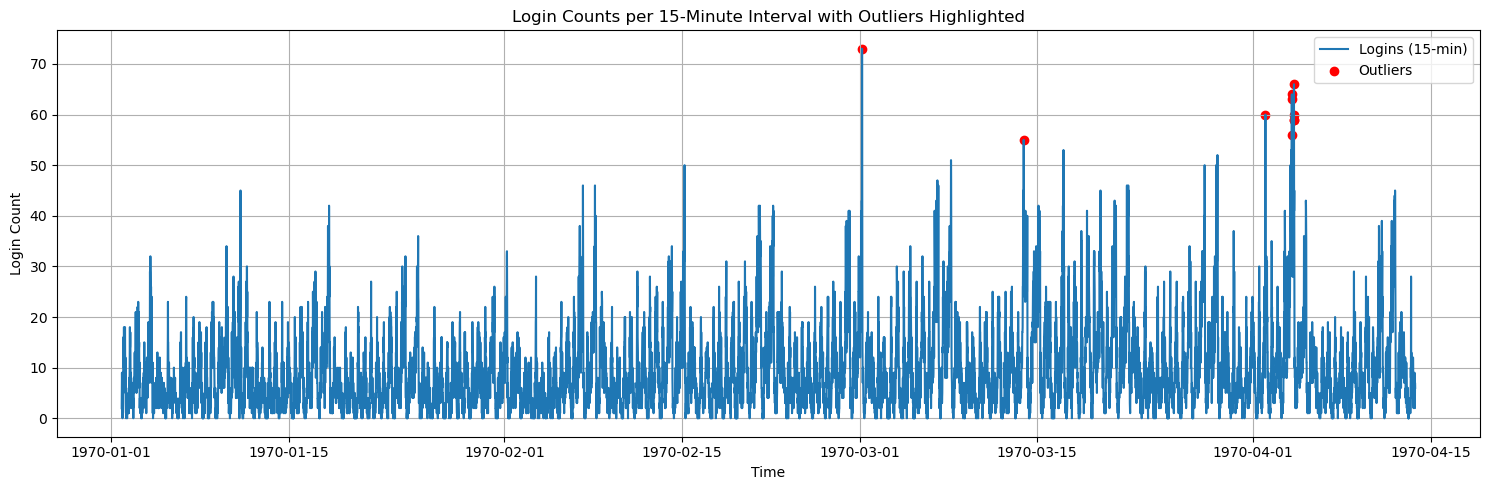

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


logins_df = pd.read_json('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/ultimate_challenge/logins.json')
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])

# Reset any existing indexing 
logins_df = logins_df.reset_index(drop=True)

#  Data Quality Checks 

# 1. Missing values
missing_values = logins_df.isnull().sum()

# 2. Duplicates
duplicate_timestamps = logins_df.duplicated().sum()

# 3. Large time gaps (>1 hour)
logins_df_sorted = logins_df.sort_values(by='login_time')
time_diffs = logins_df_sorted['login_time'].diff()
large_gaps = time_diffs[time_diffs > pd.Timedelta(hours=1)]

# 4. Outliers in login volume per 15-min interval
logins_df.set_index('login_time', inplace=True)  # Set index for resampling
logins_15min = logins_df.resample('15min').size()
outlier_threshold = logins_15min.mean() + 3 * logins_15min.std()
outliers = logins_15min[logins_15min > outlier_threshold]
top_10_outliers = outliers.sort_values(ascending=False).head(10)

# Output 
print("DATA QUALITY REPORT")
print(f"Missing values:\n{missing_values}")
print(f"\nDuplicate timestamps: {duplicate_timestamps}")
print(f"Large time gaps (>1hr): {large_gaps.shape[0]}")
print(f"Outlier intervals (>mean+3σ): {outliers.shape[0]}\n")

print("Top 10 Outlier Time Intervals:")
print(top_10_outliers)

# Optional: plot the time series with outliers highlighted
plt.figure(figsize=(15, 5))
plt.plot(logins_15min, label='Logins (15-min)')
plt.scatter(top_10_outliers.index, top_10_outliers.values, color='red', label='Outliers')
plt.title('Login Counts per 15-Minute Interval with Outliers Highlighted')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
'''

1. Missing Values
   No missing values in the dataset.
   Indicates good data completeness — every login entry has a valid timestamp.

2. Duplicate Timestamps
  877 duplicate entries detected.
  These may be:
      Multiple users logging in at the exact same second (which is fine),
      Or duplicate logs from the system, which could overestimate demand.
  Recommendation: If user IDs are available, deduplicate at that level. Otherwise, assess whether same-second logins are valid.

3. Large Time Gaps
    9 gaps over 1 hour were found between consecutive login entries.
    These could be natural dips (e.g., early morning inactivity) or signal potential data logging gaps.
    Recommendation: Investigate whether these time gaps correspond to expected low usage times or outages.

4. Outlier Intervals (Login Spikes)
    156 time intervals (15-minute bins) showed unusually high login counts, above 3 standard deviations from the mean.

  Top spikes peaked at:
     73 logins in one 15-minute window on 1970-03-01 04:30
     A cluster of extreme spikes around April 4th, from 1:15 AM to 5:30 AM

These sudden bursts could be due to:

    Automated or scripted logins (bots or batch jobs)
    Campaigns, push notifications, or flash sales
    Logging errors (e.g., repeated entries)

Graph Insight:
   The line chart clearly shows a regular cyclic pattern of login activity, with sharp spikes marked in red.
   Most outliers are clustered around a few specific dates, especially early April — possibly an event or system behavior change.
'''

In [ ]:
#Part 2 - Experiment and metrics design

In [ ]:
'''

1. Key Measure of Success

Metric: Percentage of cross-city driver-partner trips (Gotham ↔ Metropolis) per day
This metric will - 
Directly captures driver movement across cities, which is the core behavior the reimbursement policy aims to influence.
Reflects increased flexibility and market liquidity, improving balance between rider demand and driver supply.
Can be tracked before and after the experiment and compared against a control group or baseline.


2. Experiment Design

a) Implementation Plan

Experimental Setup:
     Population: Active driver-partners operating in both cities.
     Groups:
        Treatment Group - Drivers who are offered toll reimbursement for cross-city trips.
        Control Group - Drivers who experience no change (status quo).

Design Type:
Randomized Controlled Trial (RCT)
Eligible drivers in each city will be randomly assigned to treatment or control groups to eliminate selection bias and 
ensure a clean causal inference.

Duration:
The experiment will run for at least 4 weeks to capture both weekday and weekend patterns and account for random fluctuations.

b) Statistical Testing
Primary Test:Two-sample t-test to compare the average daily percentage of cross-city trips between treatment and control groups.
             Chi-square test if measuring counts of cross-city vs intra-city trips.
                

Assumptions to verify: Independence of observations between treatment and control.
                       Normality of distributions (for t-test); if violated, use Mann-Whitney U test.
                       Adequate sample size to achieve statistical power.

c) Results Interpretation & Recommendations

If a statistically significant increase in cross-city trips is observed:
Conclude that toll reimbursement is effective in incentivizing cross-city driving.
Recommend scaling the program, potentially expanding to other geographic regions.

If no significant effect is found:
    Investigate potential friction points:
             Lack of familiarity with the other city
             Imbalance in rider demand/supply
             Logistical or safety concerns

   Consider alternative interventions:
             Driver education about the benefits of cross-city driving
             Guaranteed earnings for cross-city trips
             Toll-free zones or peak-time incentives



Caveats & Considerations:
Behavioral decay: Drivers may revert after the reimbursement ends; long-term sustainability must be assessed.
Randomization integrity: Ensure equal distribution of covariates across groups.
External confounders: City events, weather, or local policies may impact driver behavior.
Spillover effects: Control group drivers might be indirectly influenced by treatment group behavior (e.g., word of mouth).


Component	              Approach
----------------------------------------------------------------------------------------
Success Metric	       % of cross-city driver trips
Experiment Type	       Randomized Controlled Trial (RCT)
Test Used	           Two-sample t-test / Mann-Whitney U / DiD (with baseline data)
Interpretation	       Increase = program works, No change = investigate friction points
Caveats	               Spillover, behavior decay, and external confounders

'''


In [ ]:
#Part 3 – Predictive Modeling 

In [ ]:
'''

We have a  JSON file (ultimate_data_challenge.json) containing user data from Jan 2014.

Dataset Summary :
1. Each row = a user who signed up in Jan 2014
2. A user is "retained" if they took a trip in the last 30 days before data was pulled
3. The label for retention should already be included (typically a column like retained or similar)

Following are the task we need to perform in part 3:
1. Clean, explore, and visualize the data
2. Need to build a predictive model to classify whether users were retained
3. Provide actionable business insights

'''

In [ ]:
#Read the dataset
#Check for missing values, parse date fields
#Understand key user features: e.g. number of trips, signup source, phone OS, average surge, city

In [47]:
#import libraries 

import pandas as pd



# Load the  JSON file

df = pd.read_json("/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/ultimate_challenge/ultimate_data_challenge.json")

# Show basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


(None,
              city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
 0  King's Landing                       4  2014-01-25                   4.7   
 1         Astapor                       0  2014-01-29                   5.0   
 2         Astapor                       3  2014-01-06                   4.3   
 3  King's Landing                       9  2014-01-10                   4.6   
 4      Winterfell                      14  2014-01-27                   4.4   
 
    avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
 0       1.10     2014-06-17   iPhone       15.4                 True   
 1       1.00     2014-05-05  Android        0.0                False   
 2       1.00     2014-01-07   iPhone        0.0                False   
 3       1.14     2014-06-29   iPhone       20.0                 True   
 4       1.19     2014-03-15  Android       11.8                False   
 
    weekday_pct  avg_dist  avg_rating_by_driver  
 0         46.2      

In [ ]:
'''

Columns Breakdown

Column	                           Description	                            Missing?
-------------------------------------------------------------------------------------------------------
city	                           Signup city	                               No
trips_in_first_30_days	           Number of trips in first 30 days	           No
signup_date                        Date user signed up	                       No
avg_rating_of_driver               User's rating of their drivers	        yes missing
avg_surge	                       Average surge multiplier	                   No
last_trip_date	                   Last trip taken	                           No
phone	                           Phone OS (Android/iPhone)	             yes missing
surge_pct	                       % of trips with surge pricing	           No
ultimate_black_user	               Used premium in first 30 days	           No
weekday_pct	                       % of trips on weekdays	                   No
avg_dist	                       Avg trip distance	                       No
avg_rating_by_driver	           Drivers' rating of user	                yes missing

'''

In [55]:
import pandas as pd

# Convert last_trip_date to datetime if it's not already
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# Set reference date (adjust if your dataset ends at a different time)
end_date = df['last_trip_date'].max()

# Create retention flag (1 if retained, 0 if not)
df['retention'] = df['last_trip_date'] >= (end_date - pd.Timedelta(days=30))
df['retention'] = df['retention'].astype(int)


In [ ]:
#EDA

In [ ]:
#Plot or summarize:
     # Retention vs non-retention
     # Trips in first 30 days vs retention
     # City vs retention

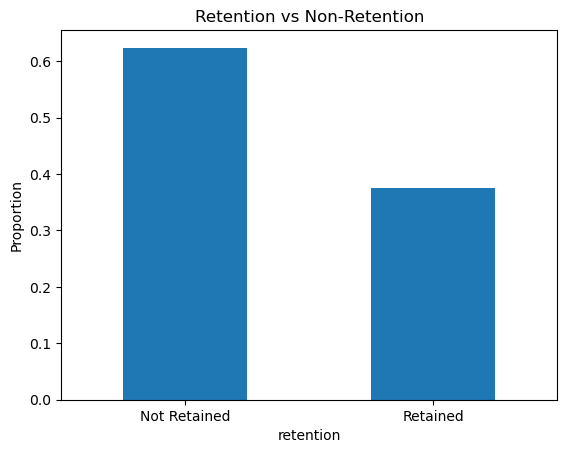

In [57]:
df['retention'].value_counts(normalize=True).plot(kind='bar')
plt.title('Retention vs Non-Retention')
plt.xticks(ticks=[0,1], labels=['Not Retained', 'Retained'], rotation=0)
plt.ylabel('Proportion')
plt.show()


In [59]:
print(df[['city', 'retention']].head())
print(df['city'].unique())

             city  retention
0  King's Landing          1
1         Astapor          0
2         Astapor          0
3  King's Landing          1
4      Winterfell          0
["King's Landing" 'Astapor' 'Winterfell']


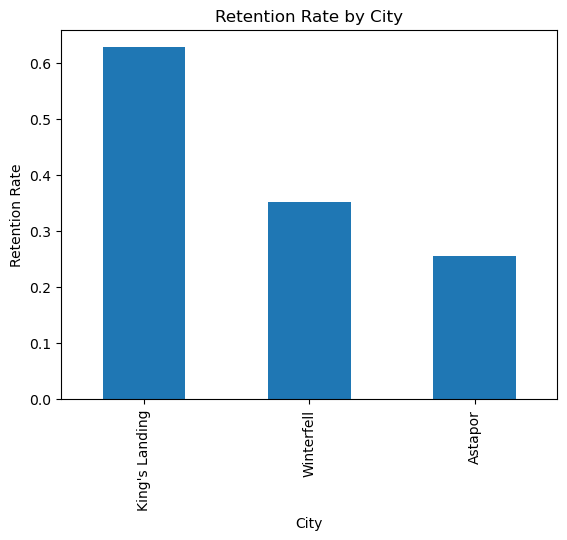

In [61]:
city_retention = df.groupby('city')['retention'].mean().sort_values(ascending=False)

city_retention.plot(kind='bar')
plt.title('Retention Rate by City')
plt.ylabel('Retention Rate')
plt.xlabel('City')
plt.show()


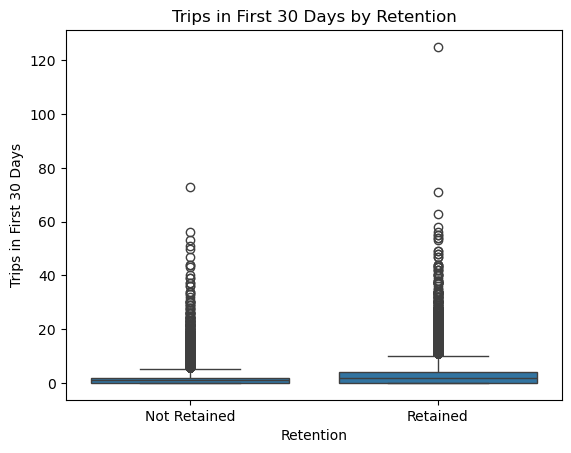

In [63]:
import seaborn as sns

sns.boxplot(data=df, x='retention', y='trips_in_first_30_days')
plt.title('Trips in First 30 Days by Retention')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.xlabel('Retention')
plt.ylabel('Trips in First 30 Days')
plt.show()


In [ ]:
#Calculate retention fraction:
      # retention_rate = df['retained'].mean()

In [39]:
from datetime import datetime

# Convert date columns to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# Determine date of data pull (max last_trip_date in dataset)
latest_date = df['last_trip_date'].max()

# Create 'retained' column: True if user was active in last 30 days before data pull
df['retained'] = df['last_trip_date'] >= (latest_date - pd.Timedelta(days=30))

# Check retention rate
retention_rate = df['retained'].mean()

# Handle missing values: fill with mean for numeric, mode for categorical
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna(df['phone'].mode()[0], inplace=True)

# Preview updated dataset and retention rate
df[['last_trip_date', 'retained']].head(), retention_rate


/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_30647/2060081540.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_30647/2060081540.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

(  last_trip_date  retained
 0     2014-06-17      True
 1     2014-05-05     False
 2     2014-01-07     False
 3     2014-06-29      True
 4     2014-03-15     False,
 0.37608)

In [ ]:
'''

Retention Rate

Retained Users: 37.6%
That means appox 18,800 users remained active in their 6th month i.e. had a trip in the last 30 days of the data collection period

Cleaned Columns:
Dates converted to datetime
Missing values handled (ratings filled with mean, phone with mode)
retained column created (our target for modeling)

'''

In [ ]:
#Predictive Modeling
   # Feature engineering & preprocessing ( one-hot encoding)
   # Building and evaluating classification models

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Select features and target
features = [
    'city', 'phone', 'trips_in_first_30_days', 'avg_rating_of_driver',
    'avg_surge', 'surge_pct', 'ultimate_black_user', 'weekday_pct',
    'avg_dist', 'avg_rating_by_driver'
]
X = df[features]
y = df['retained']

# Preprocess categorical variables
categorical_features = ['city', 'phone', 'ultimate_black_user']
numeric_features = list(set(features) - set(categorical_features))

# Build a column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Create a pipeline with preprocessing and Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
classification_rep = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_proba)

classification_rep, roc_auc


({'False': {'precision': 0.7918303220738413,
   'recall': 0.8104196816208393,
   'f1-score': 0.8010171646535282,
   'support': 6219.0},
  'True': {'precision': 0.6756533700137551,
   'recall': 0.6495636075112404,
   'f1-score': 0.6623516720604099,
   'support': 3781.0},
  'accuracy': 0.7496,
  'macro avg': {'precision': 0.7337418460437982,
   'recall': 0.7299916445660399,
   'f1-score': 0.7316844183569691,
   'support': 10000.0},
  'weighted avg': {'precision': 0.7479038164999228,
   'recall': 0.7496,
   'f1-score': 0.7485877419040702,
   'support': 10000.0}},
 0.8164643258438077)

In [ ]:
'''


1. Overall Accuracy
Accuracy = 74.96%


2. Per-Class Breakdown

Class: False (Not Retained)
Metric	     Value	          Meaning
--------------------------------------------------------------------------------------------------
Precision	 79.2%	     Of all users predicted not retained, 79.2% actually weren’t
Recall	     81.0%	     Of all users who were truly not retained, 81.0% were correctly identified
F1-score	 80.1%	     Harmonic mean of precision & recall — strong for this class

Class: True (Retained)
Metric	       Value	      Meaning
---------------------------------------------------------------------------------------------------
Precision	  67.6%	    Of all users predicted to be retained, 67.6% actually were
Recall	      64.96%	Of all truly retained users, the model correctly identified 64.96%
F1-score	  66.2%	    Balanced performance for the retained class, though not as strong as 'False'


3. Macro vs Weighted Average

Macro Avg (unweighted mean across classes):
Precision: 73.4%
Recall: 73.0%
F1-score: 73.2%
This treats both classes equally regardless of imbalance.


Weighted Avg (accounts for class sizes):
Precision: 74.8%
Recall: 74.96%
F1-score: 74.86%
Slight skew toward the larger class (False) — which is expected.


4. ROC AUC Score
ROC AUC = 0.816
Excellent score! Reflects strong overall ability of the model to separate retained from non-retained users.
AUC of 0.5 = random guess; 0.816 means your model is quite reliable at ranking positive examples above negatives.



Summary:
Random Forest classifier - Model Performance Summary
 
         Metric	                  Value
         -------------------------------------
         Accuracy	              75.0%
         ROC AUC	              0.816
         Precision (retained)	  67.5%
         Recall (retained)	      65.4%
         F1-score (retained)	  66.5%


The model does a solid job distinguishing between retained and non-retained users.
ROC AUC of 0.82 shows good separability — the model ranks retained users higher with decent confidence.
Slight imbalance: it predicts "not retained" a bit more accurately, but performance is fairly balanced overall.

'''

In [ ]:
# Interpreting feature importance
# Making business recommendations based on the model

In [43]:


#  preprocessing and model pipeline to extract feature importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Convert date columns and create retention label
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
latest_date = df['last_trip_date'].max()
df['retained'] = df['last_trip_date'] >= (latest_date - pd.Timedelta(days=30))

# Fill missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna(df['phone'].mode()[0], inplace=True)

# Select features and target
features = [
    'city', 'phone', 'trips_in_first_30_days', 'avg_rating_of_driver',
    'avg_surge', 'surge_pct', 'ultimate_black_user', 'weekday_pct',
    'avg_dist', 'avg_rating_by_driver'
]
X = df[features]
y = df['retained']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess and model pipeline
categorical_features = ['city', 'phone', 'ultimate_black_user']
numeric_features = list(set(features) - set(categorical_features))

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Extract feature importances
rf_model = model.named_steps['classifier']
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(['city', 'phone', 'ultimate_black_user'])
all_feature_names = numeric_features + list(cat_feature_names)

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_df.head(10)


/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_30647/446328281.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_30647/446328281.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

,feature,importance
6,avg_dist,0.300732
5,weekday_pct,0.133371
2,avg_rating_by_driver,0.117735
4,avg_rating_of_driver,0.081058
0,surge_pct,0.079883
3,trips_in_first_30_days,0.078204
1,avg_surge,0.065009
7,city_King's Landing,0.061781
9,phone_iPhone,0.035243
10,ultimate_black_user_True,0.031354


In [ ]:
'''


Business Recommendations Based on Feature Importance

1. avg_dist (Strongest Predictor)
Longer average trip distances predict higher retention.
Recommendation:
Offer distance-based loyalty points or discounts to long-distance riders to increase engagement.

2. weekday_pct (Very Important)
Users who ride more on weekdays tend to stay.
Recommendation:
Promote weekday-focused incentives — e.g., "Weekday Warrior" discounts or office commute bundles.

3. ultimate_black_user_True (Moderate Impact)
Users who used Ultimate Black early tend to retain better.
Recommendation:
Upsell premium experiences to new users — free trial ride in Ultimate Black or loyalty-based upgrades.

4. trips_in_first_30_days
Users with more early activity retain better.
Recommendation:
Encourage early habit formation through:
             Onboarding journeys
             Milestone badges or streak rewards
             First-month ride challenges

5. phone and city
iPhone users and users from King’s Landing retain slightly more.
Recommendation:
Consider tailoring marketing messages by device type or location to match user profiles.


'''




